# **About the Feature:**

**Feature Name: Content statistics**


By: Sri Sruthi Chilukuri


Team Name: Shecodes 

**About the Feature:**


When it comes to exploring the given data content ; there are mainly 3 ways to do it:

* Exploratory Graphics
* Exploratory Statitics
* Descriptive Statitics

**Exploratory Graphics** refers to analysing the data through the visual methods by using plots, graphs and fighures.

It also refers to the Exploratory data analysis we do as the priliminary step in any machine learning problem.It is the best way to check for the shape, gaps or outliers as it is very information dense. Good examples are : Bar chart, Normal distribution graphs, boxplots, wordclouds, etc.
This is done to :

*  Feel the data
*  see their distributions
*  Check if the assumptions match the methods/models.
*  Check for anomalies or outliers
*  any ususual distributions or errors.

**Exploratory Statistics** refers to dealing with numerics in the data and get emperical estimates. We can also manipulate the data using transforming variables. This helps in checking the sensitivity.

Few popular ways of performing robust statistical analysis include:

*  Resampling
*  Cross validation
*  smoothing functions
*  Mean, Mode, median to see spread of data
*  range, percentiles, interquartile range, variance and standard deviation to measure skewness.


**Descriptive statistics:** They tell data story and they use  little data to stand in for a lot of data. It refers to the data story that we tell to solve any business problem.


In [0]:
import pandas as pd
import numpy as np
import csv
import re
import seaborn as sns
from google.colab import drive
import gensim
from scipy.spatial.distance import cosine
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from nltk.stem.porter import PorterStemmer
from sklearn import metrics
from gensim.models.word2vec import Word2Vec
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.pipeline import Pipeline
from nltk.corpus import stopwords
from string import punctuation
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
import matplotlib.pyplot as plt
from scipy import sparse
from gensim.models.doc2vec import TaggedDocument




/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [0]:
drive.mount('/content/drive')
# Load Fake News dataset from Kaggle


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


##Kaggle Fake News dataset

In [0]:
fake_train = pd.read_csv("/content/drive/Shared drives/SheCodes/Datasets/fakenews/train_fakenews.csv",sep=',')
fake_test = pd.read_csv("/content/drive/Shared drives/SheCodes/Datasets/fakenews/test_fakenews.csv",sep=',')
fake_submit = pd.read_csv("/content/drive/Shared drives/SheCodes/Datasets/fakenews/submit_fakenews.csv",sep=',')
fake_test = pd.merge(fake_test, fake_submit, on="id", how='left')
fake_train.head()


,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [0]:
df_kaggle = pd.concat([fake_train, fake_test])
df_kaggle.shape
# Pick only title and text columns from Kaggle dataset
df_final = df_kaggle[['title', 'text', 'label']]
df_final.shape

(26000, 3)

##Liar-Liar dataset

In [0]:
# Load Liar-Liar dataset
columns = [
  'jsonid', 
  'label', 
  'text', 
  'subject', 
  'speaker', 
  'speakerjobtitle', 
  'stateinfo',
  'partyaffiliation', 
  'barelytruecounts', 
  'falsecounts',
  'halftruecounts',
  'mostlytrueocunts',
  'pantsonfirecounts',
  'context'
  ]
train_news = pd.read_csv("/content/drive/Shared drives/SheCodes/Datasets/liar_dataset/train.tsv",sep='\t', names=columns)
test_news = pd.read_csv("/content/drive/Shared drives/SheCodes/Datasets/liar_dataset/test.tsv",sep='\t', names=columns)
valid_news = pd.read_csv("/content/drive/Shared drives/SheCodes/Datasets/liar_dataset/valid.tsv",sep='\t', names=columns)

In [0]:
cat_to_nums = {"label":     {"true":1, "false":0, "barely-true": 0, "half-true": 0, "mostly-true": 1,"pants-fire": 0} }
train_news.replace(cat_to_nums, inplace=True)
train_news['label']


0        0
1        0
2        1
3        0
4        0
        ..
10235    1
10236    1
10237    0
10238    0
10239    0
Name: label, Length: 10240, dtype: int64

In [0]:
# Drop unwanted features from liar liar train dataset
liar_train_new = train_news.drop(['jsonid','subject','speaker', 'speakerjobtitle','stateinfo','partyaffiliation',
 'context'], axis = 1)

In [0]:
liar_train_new

,label,text,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts
0,0,Says the Annies List political group supports ...,0.0,1.0,0.0,0.0,0.0
1,0,When did the decline of coal start? It started...,0.0,0.0,1.0,1.0,0.0
2,1,"Hillary Clinton agrees with John McCain ""by vo...",70.0,71.0,160.0,163.0,9.0
3,0,Health care reform legislation is likely to ma...,7.0,19.0,3.0,5.0,44.0
4,0,The economic turnaround started at the end of ...,15.0,9.0,20.0,19.0,2.0
...,...,...,...,...,...,...,...
10235,1,There are a larger number of shark attacks in ...,0.0,1.0,1.0,1.0,0.0
10236,1,Democrats have now become the party of the [At...,0.0,0.0,0.0,1.0,0.0
10237,0,Says an alternative to Social Security that op...,4.0,11.0,5.0,3.0,3.0
10238,0,On lifting the U.S. Cuban embargo and allowing...,3.0,1.0,3.0,0.0,0.0


##Tracing Feature Importance through Gini Index

In [0]:
#retaining the historical features after plotting their feature importance using giniindex
liar_train_gini = liar_train_new.drop(['text'], axis = 1)

In [0]:
Y = liar_train_gini['label']
x = liar_train_gini.drop(['label'], axis=1, inplace=True)

In [0]:
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot

In [0]:
 model = XGBClassifier()
 model.fit(liar_train_gini, Y)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

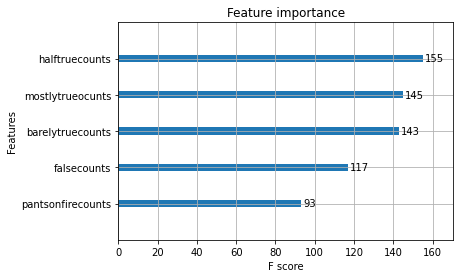

In [0]:
plot_importance(model)
pyplot.show()

It is Noted that the historical features have significant importance; hence uisng them while applying my "Content Statistics" feature on the dataset.

In [0]:
liar_train_new

,label,text,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts
0,0,Says the Annies List political group supports ...,0.0,1.0,0.0,0.0,0.0
1,0,When did the decline of coal start? It started...,0.0,0.0,1.0,1.0,0.0
2,1,"Hillary Clinton agrees with John McCain ""by vo...",70.0,71.0,160.0,163.0,9.0
3,0,Health care reform legislation is likely to ma...,7.0,19.0,3.0,5.0,44.0
4,0,The economic turnaround started at the end of ...,15.0,9.0,20.0,19.0,2.0
...,...,...,...,...,...,...,...
10235,1,There are a larger number of shark attacks in ...,0.0,1.0,1.0,1.0,0.0
10236,1,Democrats have now become the party of the [At...,0.0,0.0,0.0,1.0,0.0
10237,0,Says an alternative to Social Security that op...,4.0,11.0,5.0,3.0,3.0
10238,0,On lifting the U.S. Cuban embargo and allowing...,3.0,1.0,3.0,0.0,0.0


In [0]:
# Drop unwanted features from liar liar test dataset
liar_test_new = test_news.drop(['jsonid','subject','speaker', 'speakerjobtitle','stateinfo','partyaffiliation','context'], axis = 1)
liar_test_new.head()

,label,text,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts
0,true,Building a wall on the U.S.-Mexico border will...,30,30,42,23,18
1,false,Wisconsin is on pace to double the number of l...,2,1,0,0,0
2,false,Says John McCain has done nothing to help the ...,63,114,51,37,61
3,half-true,Suzanne Bonamici supports a plan that will cut...,1,1,3,1,1
4,pants-fire,When asked by a reporter whether hes at the ce...,5,7,2,2,7


In [0]:
liar_test_new['label'].unique()

array(['true', 'false', 'half-true', 'pants-fire', 'barely-true',
       'mostly-true'], dtype=object)

In [0]:
# Merging Kaggle Fake news dataset and Liar Liar dataset
merged_train_data = pd.concat([fake_train, liar_train_new])
merged_test_data = pd.concat([fake_test, liar_test_new])

##Politifact dataset

In [0]:
# Load Politifact news dataset
politifact_fake = pd.read_csv("/content/drive/Shared drives/SheCodes/Datasets/politifact_dataset/Fake.csv",sep=',')
politifact_fake['label'] = 1
politifact_true = pd.read_csv("/content/drive/Shared drives/SheCodes/Datasets/politifact_dataset/True.csv",sep=',')
politifact_true['label'] = 0
df_politifact = pd.concat([politifact_fake, politifact_true])
df_politifact.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


In [0]:
df_politifact_new = df_politifact[['title', 'text', 'label']]

##Data Amalgamation of all 3 datasets

In [0]:
df_train_final = pd.concat([merged_train_data, df_politifact_new])
df_test_final = merged_test_data.copy()
df_train_final = df_train_final.sample(frac=1).reset_index(drop=True)
df_test_final = df_train_final.sample(frac=1).reset_index(drop=True)
df_train_final.head()

,id,title,author,text,label,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts
0,19475.0,Arrests for Cannabis Possession Outnumber Arre...,The Mind Unleashed,Arrests for Cannabis Possession Outnumber Arre...,1,NaN,NaN,NaN,NaN,NaN
1,NaN,BUSTED: Donald Trump Protected Known Cocaine ...,NaN,Republicans like Maine Governor Paul LePage li...,1,NaN,NaN,NaN,NaN,NaN
2,NaN,Trump to nominate Heather Wilson as Air Force ...,NaN,WASHINGTON (Reuters) - President Donald Trump ...,0,NaN,NaN,NaN,NaN,NaN
3,NaN,Trump Just Added A White Nationalist To His O...,NaN,Donald Trump s presidential campaign has enlis...,1,NaN,NaN,NaN,NaN,NaN
4,9302.0,When Community-Supported Agriculture Is Not Wh...,Julia Moskin,"Last Tuesday, a subscription service called...",0,NaN,NaN,NaN,NaN,NaN


In [0]:
df_train_final.shape

(75938, 10)

In [0]:
df_train_final = df_train_final.fillna(0)

In [0]:
df_train_final

,id,title,author,text,label,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts
0,19475.0,Arrests for Cannabis Possession Outnumber Arre...,The Mind Unleashed,Arrests for Cannabis Possession Outnumber Arre...,1,0.0,0.0,0.0,0.0,0.0
1,0.0,BUSTED: Donald Trump Protected Known Cocaine ...,0,Republicans like Maine Governor Paul LePage li...,1,0.0,0.0,0.0,0.0,0.0
2,0.0,Trump to nominate Heather Wilson as Air Force ...,0,WASHINGTON (Reuters) - President Donald Trump ...,0,0.0,0.0,0.0,0.0,0.0
3,0.0,Trump Just Added A White Nationalist To His O...,0,Donald Trump s presidential campaign has enlis...,1,0.0,0.0,0.0,0.0,0.0
4,9302.0,When Community-Supported Agriculture Is Not Wh...,Julia Moskin,"Last Tuesday, a subscription service called...",0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
75933,0.0,"Replacing, repealing Obamacare at same time 'i...",0,WASHINGTON (Reuters) - Repealing and replacing...,0,0.0,0.0,0.0,0.0,0.0
75934,0.0,ONE IMAGE PERFECTLY Captures Who’s Really Behi...,0,Unfounded claims that President Trump was film...,1,0.0,0.0,0.0,0.0,0.0
75935,0.0,"Chinese, Vietnamese Communist parties have 'sh...",0,BEIJING (Reuters) - China and Vietnam s Commun...,0,0.0,0.0,0.0,0.0,0.0
75936,0.0,SEX ROULETTE PARTIES On The Rise…One Person Is...,0,Culture rot The health professionals who will ...,1,0.0,0.0,0.0,0.0,0.0


##Data Cleaning and Preprocessing

In [0]:
import re
import time
import nltk
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

# Remove this line when you want to run this for complete dataset
df_train_final = df_train_final.truncate(after=10000)
df_train_final = df_train_final.truncate(after=10000)

def text_cleaning(text):
  lemmatizer = WordNetLemmatizer()
  #clean_text = re.sub("[^a-zA-Z]", " ", text)
  clean_text = re.sub("[^a-zA-Z]", " ",str(text))
  lowered_text = clean_text.lower()
  words = nltk.word_tokenize(lowered_text)
  # All stop words
  stop_words = set(nltk.corpus.stopwords.words("english"))
  filtered_words = [word for word in  words  if not word in stop_words]
  lemm_words = [lemmatizer.lemmatize(word) for word in filtered_words]
  stems = [SnowballStemmer('english').stem(word) for word in lemm_words]
  return " ".join(stems)

t1 = time.time()
df_train_final["title"] = df_train_final["title"].apply(text_cleaning)
df_train_final["text"] = df_train_final["text"].apply(text_cleaning)
t2 = time.time()
print("Time take for text cleaning with length: {} is {} mins".format(len(df_train_final), (t2-t1)/60))
df_train_final.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Time take for text cleaning with length: 10001 is 1.2348197182019551 mins


,id,title,author,text,label,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts
0,19475.0,arrest cannabi possess outnumb arrest violent ...,The Mind Unleashed,arrest cannabi possess outnumb arrest violent ...,1,0.0,0.0,0.0,0.0,0.0
1,0.0,bust donald trump protect known cocain traffic...,0,republican like main governor paul lepag like ...,1,0.0,0.0,0.0,0.0,0.0
2,0.0,trump nomin heather wilson air forc secretari,0,washington reuter presid donald trump nomin fo...,0,0.0,0.0,0.0,0.0,0.0
3,0.0,trump ad white nationalist offici convent team,0,donald trump presidenti campaign enlist avow w...,1,0.0,0.0,0.0,0.0,0.0
4,9302.0,communiti support agricultur seem new york time,Julia Moskin,last tuesday subscript servic call local root ...,0,0.0,0.0,0.0,0.0,0.0


In [0]:
t1 = time.time()
df_test_final["title"] = df_test_final["title"].apply(text_cleaning)
df_test_final["text"] = df_test_final["text"].apply(text_cleaning)
t2 = time.time()
print("Time take for text cleaning with length: {} is {} mins".format(len(df_test_final), (t2-t1)/60))
df_test_final.head()

Time take for text cleaning with length: 75938 is 9.18596156835556 mins


,id,title,author,text,label,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts
0,NaN,trump nomine israel ambassador heckl question ...,NaN,washington reuter presid donald trump nomine u...,0,NaN,NaN,NaN,NaN,NaN
1,NaN,kenya delay elect area risk violenc,NaN,nairobi reuter kenyan author said friday would...,0,NaN,NaN,NaN,NaN,NaN
2,NaN,nan,NaN,harri reid vote use taxpay dollar pay viagra c...,0,3.0,1.0,1.0,0.0,0.0
3,NaN,two comedian imagin trump berni debat hilari v...,NaN,donald trump recent said would love debat demo...,1,NaN,NaN,NaN,NaN,NaN
4,NaN,sheriff clark obama final day obama like tenan...,NaN,,1,NaN,NaN,NaN,NaN,NaN


Creating a checkpoint here after cleaning the final amalgamanted data and importing it to a csv file named sprint4CS.csv

In [0]:
df_train_final.to_csv("/content/drive/Shared drives/SheCodes/Datasets/sprint4CS.csv", index=False)

In [0]:
df_cs = df_train_final.copy()

In [0]:
df_cs.head(2)

,id,title,author,text,label,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts
0,19475.0,arrest cannabi possess outnumb arrest violent ...,The Mind Unleashed,arrest cannabi possess outnumb arrest violent ...,1,0.0,0.0,0.0,0.0,0.0
1,0.0,bust donald trump protect known cocain traffic...,0,republican like main governor paul lepag like ...,1,0.0,0.0,0.0,0.0,0.0


##Exploratory statistics

**Number of characters in "Title" and "Text"**

Extracting samples number in each class of the dataset

In [0]:
fake = df_cs[df_cs['label'] == 1].shape[0]
Not_fake = df_cs[df_cs['label'] == 0].shape[0]

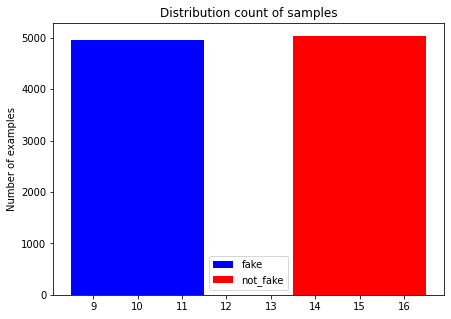

In [0]:
plt.rcParams['figure.figsize'] = (7, 5)
plt.bar(10,fake,3, label="fake", color='blue')
plt.bar(15,Not_fake,3, label="not_fake", color='red')
plt.legend()
plt.ylabel('Number of examples')
plt.title('Distribution count of samples')
plt.show()

In [0]:
df_cs['label'].value_counts()

0    5036
1    4965
Name: label, dtype: int64

Now, lets analyse the number of characters in each "title" samples; i.e. lets check the length of each "title" sample in the dataframe by plotting it over a distribution

In [0]:
def length(title):    
    return len(title)

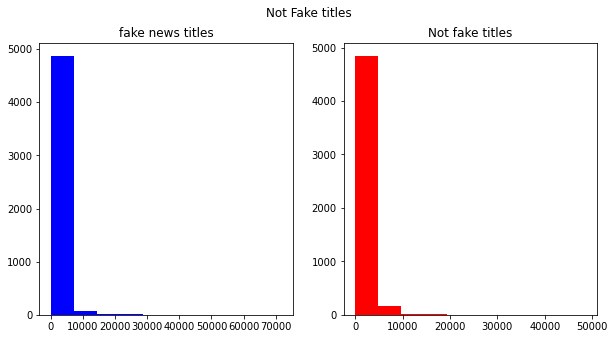

In [0]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
title_len=df_cs[df_cs['label']==1]['text'].str.len()
ax1.hist(title_len,color='blue')
ax1.set_title('fake news titles')
title_len=df_cs[df_cs['label']==0]['text'].str.len()
ax2.hist(title_len,color='red')
ax2.set_title('Not fake titles')
fig.suptitle('Not Fake titles')
plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


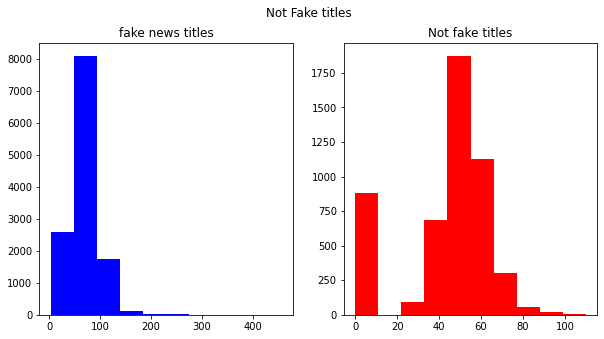

In [0]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
title_len=df_final[df_final['label']==1]['title'].str.len()
ax1.hist(title_len,color='blue')
ax1.set_title('fake news titles')
title_len=df_cs[df_cs['label']==0]['title'].str.len()
ax2.hist(title_len,color='red')
ax2.set_title('Not fake titles')
fig.suptitle('Not Fake titles')
plt.show()

Number of words in a text

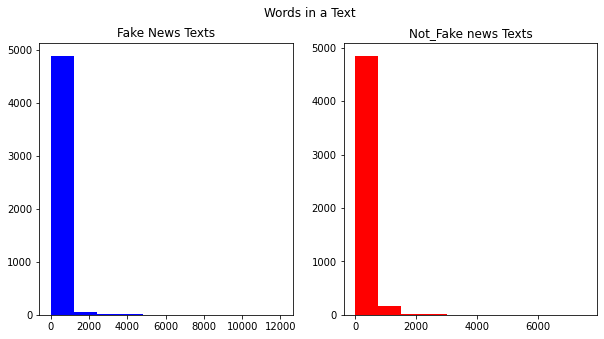

In [0]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
text_len=df_cs[df_cs['label']==1]['text'].str.split().map(lambda x: len(x))
ax1.hist(text_len,color='blue')
ax1.set_title('Fake News Texts')
text_len=df_cs[df_cs['label']==0]['text'].str.split().map(lambda x: len(x))
ax2.hist(text_len,color='red')
ax2.set_title('Not_Fake news Texts')
fig.suptitle('Words in a Text')
plt.show()

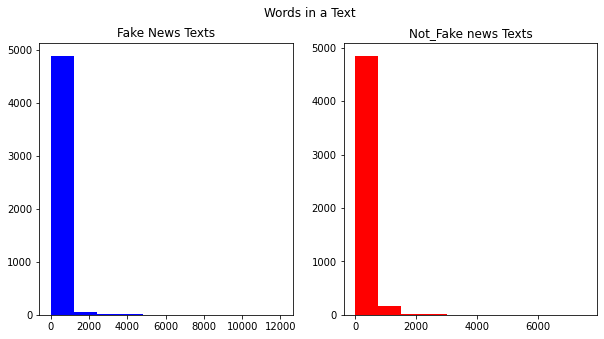

In [0]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
text_len=df_cs[df_cs['label']==1]['text'].str.split().map(lambda x: len(x))
ax1.hist(text_len,color='blue')
ax1.set_title('Fake News Texts')
text_len=df_cs[df_cs['label']==0]['text'].str.split().map(lambda x: len(x))
ax2.hist(text_len,color='red')
ax2.set_title('Not_Fake news Texts')
fig.suptitle('Words in a Text')
plt.show()

Average word Length in each Text

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Text(0.5, 0.98, 'Average word length in each News Text')

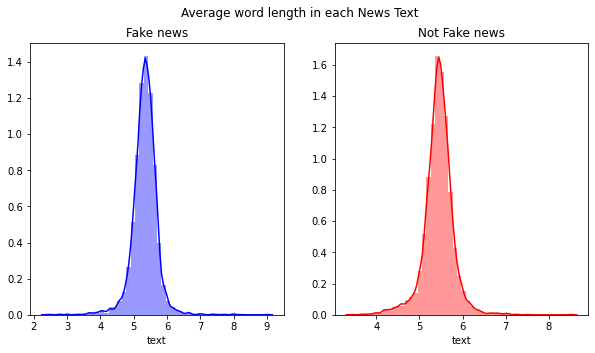

In [0]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
word=df_cs[df_cs['label']==1]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='blue')
ax1.set_title('Fake news')
word=df_cs[df_cs['label']==0]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='red')
ax2.set_title('Not Fake news')
fig.suptitle('Average word length in each News Text')

**N-Gram Analysis**

For this dataset, I will take n=2 i.e. bigram over the text of the news. Checking for the common bigrams in the texts

In [0]:
def get_top_text_bigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

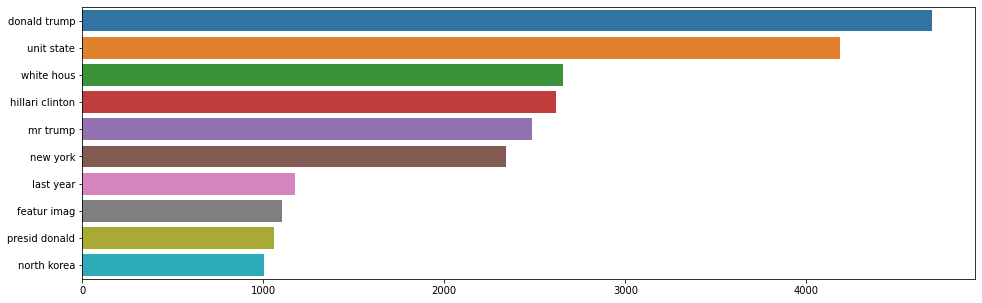

In [0]:
plt.figure(figsize=(16,5))
top_text_bigrams=get_top_text_bigrams(df_cs['text'])[:10]
x,y=map(list,zip(*top_text_bigrams))
sns.barplot(x=y,y=x)

Inference:

The terms "donald trump" and "unit state" have been most common; both in class 0 and class 1.

WordClouds

In [0]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

def plot_wordcloud(data,backgroundcolor = 'white', width = 800, height = 600):
    wordcloud = WordCloud(stopwords = STOPWORDS, background_color = backgroundcolor,
                         width = width, height = height).generate(data)
    plt.figure(figsize = (15, 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

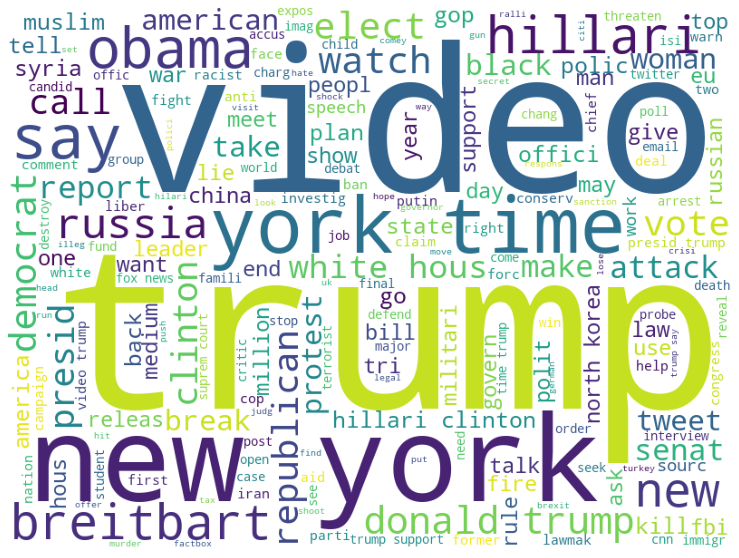

In [0]:
plot_wordcloud(' '.join(df_cs['title']))

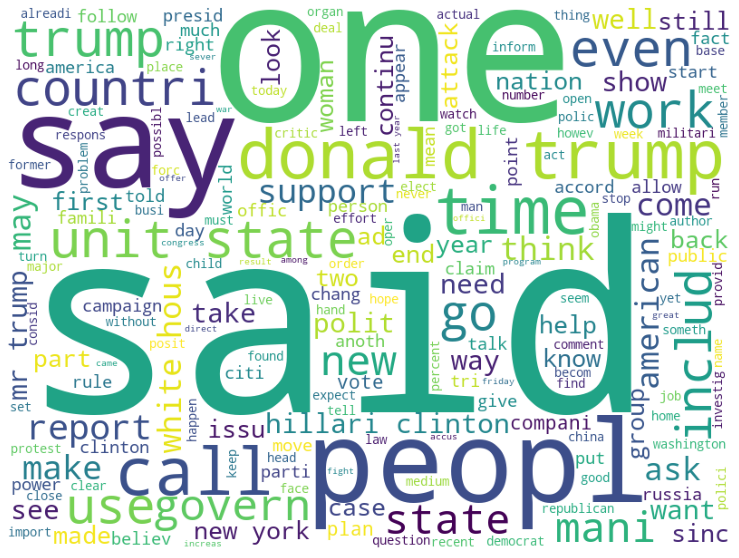

In [0]:
plot_wordcloud(' '.join(df_cs['text']))

##Generating Exploratory Features to explore Content statistics

In [0]:
import pandas as pd
from sklearn import preprocessing


In [0]:
df_cs['Title_length'] = df_cs['title'].str.len()

In [0]:
df_cs['Text_length'] = df_cs['text'].str.len()

In [0]:
df_cs

,id,title,author,text,label,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,Title_length,Text_length
0,19475.0,arrest cannabi possess outnumb arrest violent ...,The Mind Unleashed,arrest cannabi possess outnumb arrest violent ...,1,0.0,0.0,0.0,0.0,0.0,58,3037
1,0.0,bust donald trump protect known cocain traffic...,0,republican like main governor paul lepag like ...,1,0.0,0.0,0.0,0.0,0.0,53,2113
2,0.0,trump nomin heather wilson air forc secretari,0,washington reuter presid donald trump nomin fo...,0,0.0,0.0,0.0,0.0,0.0,45,290
3,0.0,trump ad white nationalist offici convent team,0,donald trump presidenti campaign enlist avow w...,1,0.0,0.0,0.0,0.0,0.0,46,1508
4,9302.0,communiti support agricultur seem new york time,Julia Moskin,last tuesday subscript servic call local root ...,0,0.0,0.0,0.0,0.0,0.0,47,6340
...,...,...,...,...,...,...,...,...,...,...,...,...
9996,0.0,,0,atlanta brave oldest continu oper profession s...,1,0.0,0.0,0.0,0.0,0.0,0,67
9997,0.0,trump support declar war paul ryan republican ...,0,donald trump go hous speaker paul ryan least t...,1,0.0,0.0,0.0,0.0,0.0,51,1703
9998,0.0,boiler room ep wonderful life,0,tune altern current radio network acr anoth li...,1,0.0,0.0,0.0,0.0,0.0,29,1181
9999,0.0,u n agre new team expert burundi eu u decri move,0,geneva reuter u n human right council agre thu...,0,0.0,0.0,0.0,0.0,0.0,48,1831


In [0]:
#normalising all the numerical columns generated 
df_cs["Title_length(norm)"] = df_cs["Title_length"] / df_cs["Title_length"].max()
df_cs["Text_length(norm)"] = df_cs["Text_length"] / df_cs["Text_length"].max()
df_cs["barelytruecounts(norm)"] = df_cs["barelytruecounts"] / df_cs["barelytruecounts"].max()
df_cs["falsecounts(norm)"] = df_cs["falsecounts"] / df_cs["falsecounts"].max()
df_cs["mostlytrueocunts(norm)"] = df_cs["mostlytrueocunts"] / df_cs["mostlytrueocunts"].max()
df_cs["pantsonfirecounts(norm)"] = df_cs["pantsonfirecounts"] / df_cs["pantsonfirecounts"].max()



In [0]:
#Generating statistical columns like mean, median and variance for the "Text" present in the dataset.
df_cs["Text_length(median)"] = df_cs["Text_length"].median()
df_cs["Text_length(mean)"] = df_cs["Text_length"].mean()
df_cs["Text_length(var)"] = df_cs["Text_length"].var()

#creating a new feature "applicability_of_text" which is a combination of then text length 
df_cs["applicability_of_text"] = df_cs["Text_length(norm)"]*df_cs["Text_length"].mean()
df_cs["applicability_of_title"] = df_cs["Title_length(norm)"]*df_cs["Title_length"].mean()

In [0]:
df_cs.head(5)

,id,title,author,text,label,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts,Title_length,Text_length,Title_length(norm),Text_length(norm),barelytruecounts(norm),falsecounts(norm),mostlytrueocunts(norm),pantsonfirecounts(norm),Text_length(median),Text_length(mean),Text_length(var),applicability_of_text,applicability_of_title
0,19475.0,arrest cannabi possess outnumb arrest violent ...,The Mind Unleashed,arrest cannabi possess outnumb arrest violent ...,1,0.0,0.0,0.0,0.0,0.0,58,3037,0.200692,0.042300,0.0,0.0,0.0,0.0,1235.0,1623.727227,4.867619e+06,68.683365,9.680155
1,0.0,bust donald trump protect known cocain traffic...,0,republican like main governor paul lepag like ...,1,0.0,0.0,0.0,0.0,0.0,53,2113,0.183391,0.029430,0.0,0.0,0.0,0.0,1235.0,1623.727227,4.867619e+06,47.786615,8.845659
2,0.0,trump nomin heather wilson air forc secretari,0,washington reuter presid donald trump nomin fo...,0,0.0,0.0,0.0,0.0,0.0,45,290,0.155709,0.004039,0.0,0.0,0.0,0.0,1235.0,1623.727227,4.867619e+06,6.558504,7.510465
3,0.0,trump ad white nationalist offici convent team,0,donald trump presidenti campaign enlist avow w...,1,0.0,0.0,0.0,0.0,0.0,46,1508,0.159170,0.021004,0.0,0.0,0.0,0.0,1235.0,1623.727227,4.867619e+06,34.104220,7.677364
4,9302.0,communiti support agricultur seem new york time,Julia Moskin,last tuesday subscript servic call local root ...,0,0.0,0.0,0.0,0.0,0.0,47,6340,0.162630,0.088305,0.0,0.0,0.0,0.0,1235.0,1623.727227,4.867619e+06,143.382462,7.844264


In [0]:
df_forLDA = df_cs.copy()

In [0]:
#df_forLDA

##Normalizing all features to reduce skewing

In [0]:
df_cs["applicability_of_text(Norm)"] = df_cs["applicability_of_text"] / df_cs["applicability_of_text"].max()*df_cs["Text_length(median)"]
df_cs["applicability_of_title(Norm)"] = df_cs["applicability_of_title"] / df_cs["applicability_of_title"].max()*df_cs["Text_length(median)"]

In [0]:
df_cs.columns

Index(['id', 'title', 'author', 'text', 'label', 'barelytruecounts',
       'falsecounts', 'halftruecounts', 'mostlytrueocunts',
       'pantsonfirecounts', 'Title_length', 'Text_length',
       'Title_length(norm)', 'Text_length(norm)', 'barelytruecounts(norm)',
       'falsecounts(norm)', 'mostlytrueocunts(norm)',
       'pantsonfirecounts(norm)', 'Text_length(median)', 'Text_length(mean)',
       'Text_length(var)', 'applicability_of_text', 'applicability_of_title',
       'applicability_of_text(Norm)', 'applicability_of_title(Norm)'],
      dtype='object')

In [0]:
#df_final = df_final.drop(['label'], axis=1)
df_cs = df_cs.drop(['title', 'text', 'barelytruecounts', 'falsecounts', 'halftruecounts', 'mostlytrueocunts', 'pantsonfirecounts', 'Title_length', 'Text_length', 'applicability_of_text', 'applicability_of_title', 'Text_length(median)', 'Text_length(mean)'], axis=1)

In [0]:
df_cs

,id,author,label,Title_length(norm),Text_length(norm),barelytruecounts(norm),falsecounts(norm),mostlytrueocunts(norm),pantsonfirecounts(norm),Text_length(var),applicability_of_text(Norm),applicability_of_title(Norm)
0,19475.0,The Mind Unleashed,1,0.200692,0.042300,0.0,0.0,0.0,0.0,4.867619e+06,52.240275,247.854671
1,0.0,0,1,0.183391,0.029430,0.0,0.0,0.0,0.0,4.867619e+06,36.346296,226.487889
2,0.0,0,0,0.155709,0.004039,0.0,0.0,0.0,0.0,4.867619e+06,4.988370,192.301038
3,0.0,0,1,0.159170,0.021004,0.0,0.0,0.0,0.0,4.867619e+06,25.939524,196.574394
4,9302.0,Julia Moskin,0,0.162630,0.088305,0.0,0.0,0.0,0.0,4.867619e+06,109.056089,200.847751
...,...,...,...,...,...,...,...,...,...,...,...,...
9996,0.0,0,1,0.000000,0.000933,0.0,0.0,0.0,0.0,4.867619e+06,1.152485,0.000000
9997,0.0,0,1,0.176471,0.023720,0.0,0.0,0.0,0.0,4.867619e+06,29.293773,217.941176
9998,0.0,0,1,0.100346,0.016449,0.0,0.0,0.0,0.0,4.867619e+06,20.314707,123.927336
9999,0.0,0,0,0.166090,0.025502,0.0,0.0,0.0,0.0,4.867619e+06,31.495536,205.121107


In [0]:
#df_final = df_final.drop(['label'], axis=1)
df_cs = df_cs.drop(['id','author'], axis=1)

##Model Training without Performing LDA

In [0]:
y = df_cs['label']
X = df_cs.drop(['label'], axis=1)

In [0]:
X.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)
X_final_train, X_final_test, y_final_train, y_final_test = train_test_split(X, y, test_size=0.20, random_state=100, stratify=y)
X_final_train.reset_index(drop=True, inplace=True)
X_final_test.reset_index(drop=True, inplace=True)
y_final_train.reset_index(drop=True, inplace=True)
y_final_test.reset_index(drop=True, inplace=True)

In [0]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, roc_auc_score, f1_score, confusion_matrix, accuracy_score, \
    classification_report, precision_recall_curve, roc_curve, auc, average_precision_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score, train_test_split, cross_val_predict
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler

In [0]:
classifiers = {
    "LogisticRegression": (LogisticRegression()),
    "KNearest": (KNeighborsClassifier()),
    "Support Vector Classifier": (SVC()),
    "DecisionTreeClassifier": (DecisionTreeClassifier()),
    "Naive Bayes": (GaussianNB()),
    "Random forests": (RandomForestClassifier()),
    "XGBoost Classifier": (XGBClassifier()),
    "GradientBoostingClassifier": (GradientBoostingClassifier()),
    "MLP Classifier": (MLPClassifier())
}

In [0]:
def run_all_models(folds=5):
    for classifier_name, classifier in classifiers.items():
        k_fold = StratifiedKFold(n_splits=folds, random_state=100, shuffle=True)
        cross_val_scores = []
        precision_scores = []
        recall_scores = []
        roc_auc_scores = []
        f1_scores = []
        for train_index, test_index in k_fold.split(X_final_train, y_final_train):
            X_train, X_test = pd.DataFrame(data=X_final_train, index=train_index), pd.DataFrame(data=X_final_train, index=test_index)
            y_train, y_test = pd.DataFrame(data=y_final_train, index=train_index), pd.DataFrame(data=y_final_train, index=test_index)
            model = classifier

            model.fit(X_train, y_train)
            scores = cross_val_score(model, X_train, y_train.values.ravel(), cv=5)
            cross_val_scores.append(scores)
            y_pred = model.predict(X_test)
            precision_scores.append(precision_score(y_test, y_pred))
            recall_scores.append(recall_score(y_test, y_pred))
            roc_auc_scores.append(roc_auc_score(y_test, y_pred))
            f1_scores.append(f1_score(y_test, y_pred))

        print('============================= {} ============================='.format(classifier_name))
        print('Mean cross validation score: {}'.format(np.array([cross_val_scores]).mean()))
        print('Mean precision score: {}'.format(np.array([precision_scores]).mean()))
        print('Mean Recall score: {}'.format(np.array([recall_scores]).mean()))
        print('Mean ROC-AUC score: {}'.format(np.array([roc_auc_scores]).mean()))
        print('Mean F1 score: {}'.format(np.array([f1_scores]).mean()))
        print('******* Real test dataset metrics *******')
        y_final_pred = model.predict((X_final_test))
        print('Accuracy score for the real test set:\n', accuracy_score(y_final_test, y_final_pred))
        print('confusion matrix for the real test set:\n', confusion_matrix(y_final_test, y_final_pred))
        print('Classification report for the real test set:\n', classification_report(y_final_test, y_final_pred))
        if classifier_name != 'Support Vector Classifier':
            y_final_pred_prob = model.predict_proba(X_test)
            plot_auc_roc_curve(y_test, y_final_pred_prob[:, 1], classifier_name)
            plot_precision_recall_curve(y_test, y_final_pred_prob[:, 1], classifier_name)



In [0]:
def plot_auc_roc_curve(y_test, y_pred, name):
    fpr, tpr, thresholds = roc_curve(y_test.to_numpy(), y_pred)
    roc_auc = auc(fpr, tpr)

    # Plot ROC
    plt.title('ROC for {}'.format(name))
    plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([-0.1, 1.0])
    plt.ylim([-0.1, 1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [0]:
def plot_precision_recall_curve(y_test, y_pred_prob, name):
    # Generate precision recall curve values: precision, recall, thresholds
    precision, recall, thresholds = precision_recall_curve(y_test.to_numpy(), y_pred_prob)

    # Plot Precision Recall curve
    plt.plot(recall, precision)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    avg_precision_score = average_precision_score(y_test, y_pred_prob)
    plt.title('PRC for {} - avg precision score: {}'.format(name, str(avg_precision_score)))
    plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

============================= LogisticRegression =============================
Mean cross validation score: 0.5720625
Mean precision score: 0.5632519124022816
Mean Recall score: 0.6284045435102894
Mean ROC-AUC score: 0.5737616324505502
Mean F1 score: 0.5938711813386133
******* Real test dataset metrics *******
Accuracy score for the real test set:
 0.5702148925537232
confusion matrix for the real test set:
 [[532 476]
 [384 609]]
Classification report for the real test set:
               precision    recall  f1-score   support

           0       0.58      0.53      0.55      1008
           1       0.56      0.61      0.59       993

    accuracy                           0.57      2001
   macro avg       0.57      0.57      0.57      2001
weighted avg       0.57      0.57      0.57      2001



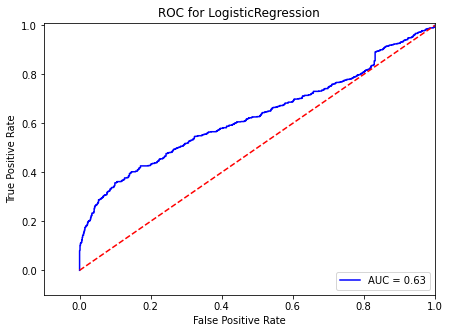

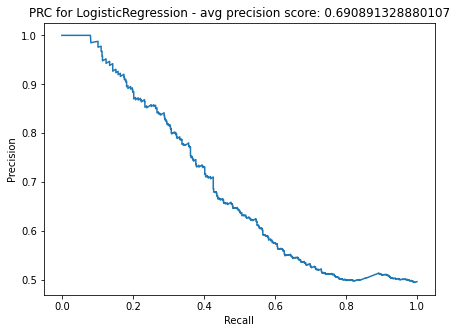

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector 

============================= KNearest =============================
Mean cross validation score: 0.6609687500000001
Mean precision score: 0.6695553287604068
Mean Recall score: 0.6440172361896614
Mean ROC-AUC score: 0.6653538703180633
Mean F1 score: 0.6565147492019536
******* Real test dataset metrics *******
Accuracy score for the real test set:
 0.6766616691654173
confusion matrix for the real test set:
 [[699 309]
 [338 655]]
Classification report for the real test set:
               precision    recall  f1-score   support

           0       0.67      0.69      0.68      1008
           1       0.68      0.66      0.67       993

    accuracy                           0.68      2001
   macro avg       0.68      0.68      0.68      2001
weighted avg       0.68      0.68      0.68      2001



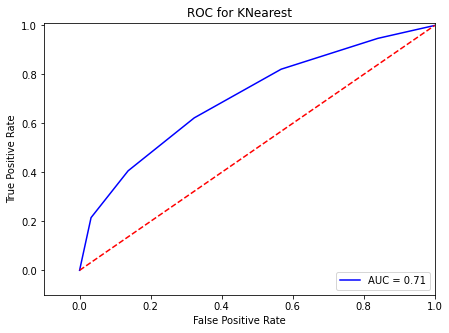

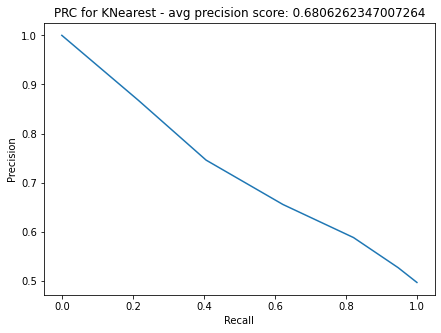

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero

============================= Support Vector Classifier =============================
Mean cross validation score: 0.5035000000000001
Mean precision score: 0.0
Mean Recall score: 0.0
Mean ROC-AUC score: 0.5
Mean F1 score: 0.0
******* Real test dataset metrics *******
Accuracy score for the real test set:
 0.5037481259370314
confusion matrix for the real test set:
 [[1008    0]
 [ 993    0]]
Classification report for the real test set:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67      1008
           1       0.00      0.00      0.00       993

    accuracy                           0.50      2001
   macro avg       0.25      0.50      0.33      2001
weighted avg       0.25      0.50      0.34      2001



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


============================= DecisionTreeClassifier =============================
Mean cross validation score: 0.633
Mean precision score: 0.6354058540295199
Mean Recall score: 0.6218604945899275
Mean ROC-AUC score: 0.6350339416370873
Mean F1 score: 0.6285413657616867
******* Real test dataset metrics *******
Accuracy score for the real test set:
 0.6471764117941029
confusion matrix for the real test set:
 [[636 372]
 [334 659]]
Classification report for the real test set:
               precision    recall  f1-score   support

           0       0.66      0.63      0.64      1008
           1       0.64      0.66      0.65       993

    accuracy                           0.65      2001
   macro avg       0.65      0.65      0.65      2001
weighted avg       0.65      0.65      0.65      2001



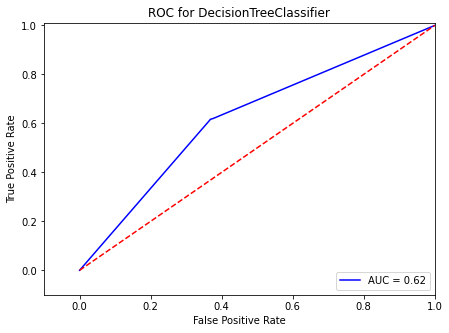

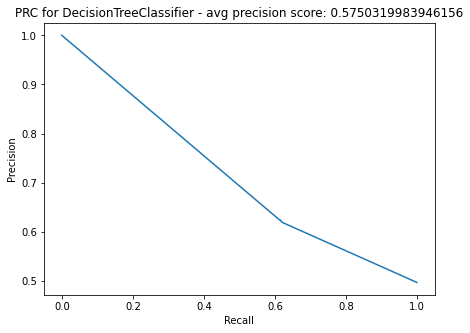

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = col

============================= Naive Bayes =============================
Mean cross validation score: 0.51515625
Mean precision score: 0.5064160489674192
Mean Recall score: 0.9753291193384344
Mean ROC-AUC score: 0.5189473301946246
Mean F1 score: 0.6666693591858717
******* Real test dataset metrics *******
Accuracy score for the real test set:
 0.5177411294352824
confusion matrix for the real test set:
 [[ 67 941]
 [ 24 969]]
Classification report for the real test set:
               precision    recall  f1-score   support

           0       0.74      0.07      0.12      1008
           1       0.51      0.98      0.67       993

    accuracy                           0.52      2001
   macro avg       0.62      0.52      0.39      2001
weighted avg       0.62      0.52      0.39      2001



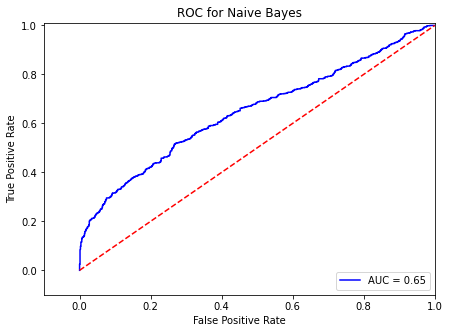

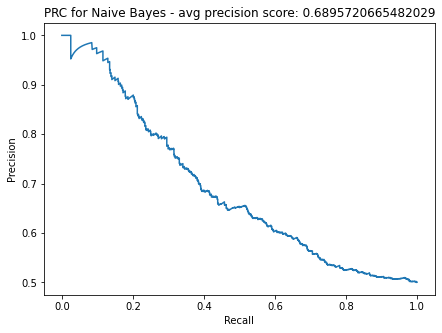

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y wa

============================= Random forests =============================
Mean cross validation score: 0.6580000000000001
Mean precision score: 0.6650935838009666
Mean Recall score: 0.6412445542829079
Mean ROC-AUC score: 0.6613614538133096
Mean F1 score: 0.6529121167596903
******* Real test dataset metrics *******
Accuracy score for the real test set:
 0.6796601699150425
confusion matrix for the real test set:
 [[693 315]
 [326 667]]
Classification report for the real test set:
               precision    recall  f1-score   support

           0       0.68      0.69      0.68      1008
           1       0.68      0.67      0.68       993

    accuracy                           0.68      2001
   macro avg       0.68      0.68      0.68      2001
weighted avg       0.68      0.68      0.68      2001



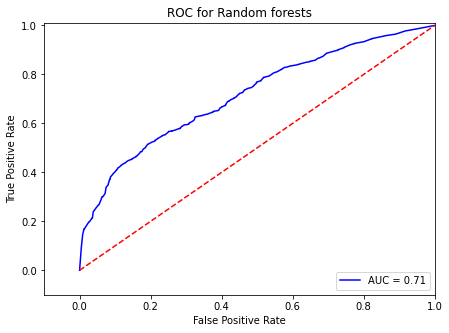

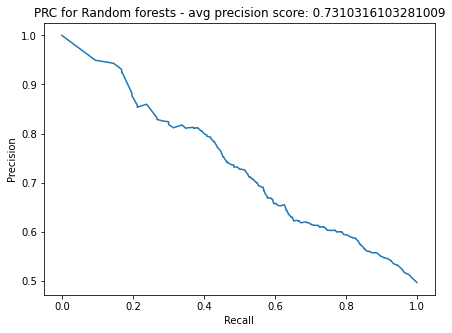

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

============================= XGBoost Classifier =============================
Mean cross validation score: 0.712375
Mean precision score: 0.7517475249443805
Mean Recall score: 0.6248765109389604
Mean ROC-AUC score: 0.7103996629259788
Mean F1 score: 0.6821306424130894
******* Real test dataset metrics *******
Accuracy score for the real test set:
 0.7246376811594203
confusion matrix for the real test set:
 [[807 201]
 [350 643]]
Classification report for the real test set:
               precision    recall  f1-score   support

           0       0.70      0.80      0.75      1008
           1       0.76      0.65      0.70       993

    accuracy                           0.72      2001
   macro avg       0.73      0.72      0.72      2001
weighted avg       0.73      0.72      0.72      2001



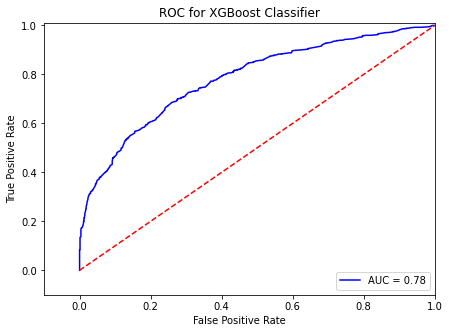

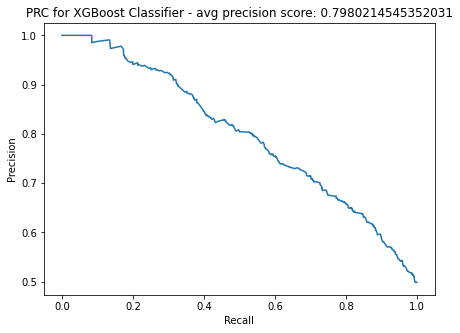

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

============================= GradientBoostingClassifier =============================
Mean cross validation score: 0.7130625
Mean precision score: 0.7464856128627833
Mean Recall score: 0.6299155616811621
Mean ROC-AUC score: 0.7093200945437081
Mean F1 score: 0.6830810634277636
******* Real test dataset metrics *******
Accuracy score for the real test set:
 0.7261369315342329
confusion matrix for the real test set:
 [[797 211]
 [337 656]]
Classification report for the real test set:
               precision    recall  f1-score   support

           0       0.70      0.79      0.74      1008
           1       0.76      0.66      0.71       993

    accuracy                           0.73      2001
   macro avg       0.73      0.73      0.72      2001
weighted avg       0.73      0.73      0.72      2001



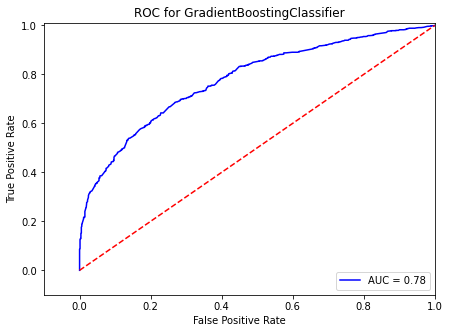

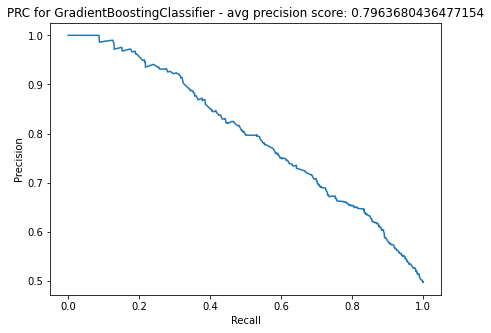

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % sel

============================= MLP Classifier =============================
Mean cross validation score: 0.50271875
Mean precision score: 0.297875
Mean Recall score: 0.6
Mean ROC-AUC score: 0.5
Mean F1 score: 0.3981066095998521
******* Real test dataset metrics *******
Accuracy score for the real test set:
 0.5037481259370314
confusion matrix for the real test set:
 [[1008    0]
 [ 993    0]]
Classification report for the real test set:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67      1008
           1       0.00      0.00      0.00       993

    accuracy                           0.50      2001
   macro avg       0.25      0.50      0.33      2001
weighted avg       0.25      0.50      0.34      2001



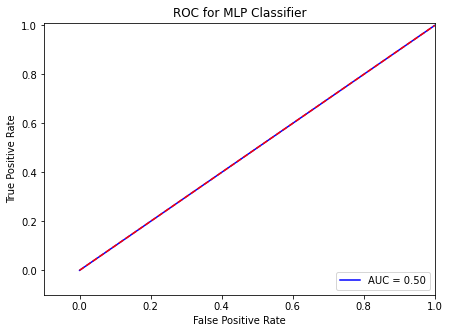

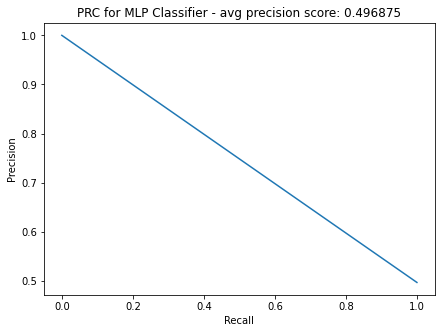

In [0]:
run_all_models()

# Performing LDA on amalgamated Dataset
AS we can see; I have generated the Accuracies for all the classification models without Running LDA. 

Using LDA to fine-tune the models further and improve accuracies 

In [0]:
# Drop unwanted features from liar liar train dataset


In [0]:
df_forLDA = df_forLDA.drop(['author','title', 'barelytruecounts', 'falsecounts', 'halftruecounts', 'mostlytrueocunts', 'pantsonfirecounts', 'Title_length',	'Text_length',	'Title_length(norm)',	'Text_length(norm)',	'barelytruecounts(norm)',	'falsecounts(norm)',	'mostlytrueocunts(norm)',	'pantsonfirecounts(norm)',	'Text_length(median)',	'Text_length(mean)',	'Text_length(var)','applicability_of_text',	'applicability_of_title'], axis = 1)

In [0]:
df_forLDA = df_forLDA.drop(['id'], axis =1)

In [0]:
df_forLDA['index'] = df_forLDA.index

In [0]:
df_forLDA

,text,label,index
0,arrest cannabi possess outnumb arrest violent ...,1,0
1,republican like main governor paul lepag like ...,1,1
2,washington reuter presid donald trump nomin fo...,0,2
3,donald trump presidenti campaign enlist avow w...,1,3
4,last tuesday subscript servic call local root ...,0,4
...,...,...,...
9996,atlanta brave oldest continu oper profession s...,1,9996
9997,donald trump go hous speaker paul ryan least t...,1,9997
9998,tune altern current radio network acr anoth li...,1,9998
9999,geneva reuter u n human right council agre thu...,0,9999


In [0]:
processed_docs = df_forLDA['text'].map(lambda doc: doc.split(" "))
processed_docs[:4]

0    [arrest, cannabi, possess, outnumb, arrest, vi...
1    [republican, like, main, governor, paul, lepag...
2    [washington, reuter, presid, donald, trump, no...
3    [donald, trump, presidenti, campaign, enlist, ...
Name: text, dtype: object

In [0]:
def get_word_tokens(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if len(token) > 3:
            result.append(token)
    return result
tokenized_docs_local = df_forLDA['text'].map(get_word_tokens)

In [0]:
def get_dictionary_print_words(dataframe,colname):
    dictionary_gensim = gensim.corpora.Dictionary(processed_docs)
    count = 0
    print('######## DICTIONARY Words and occurences ########')
    for k, v in dictionary_gensim.iteritems():
        print(k, v)
        count += 1
        if count > 10:
            break
    dictionary_gensim.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)
    return dictionary_gensim, tokenized_docs_local

In [0]:
def get_bow_corpus_print_sample(dataframe,colname):
    dictionary_gensim, tokenized_docs_local = get_dictionary_print_words(dataframe, colname)
    bow_corpus_local = [dictionary_gensim.doc2bow(doc) for doc in tokenized_docs_local]
    bow_doc_local_0 = bow_corpus_local[0]
    print('\n ######## BOW VECTOR FIRST ITEM ########')
    print(bow_doc_local_0)
    print('\n ######## PREVIEW BOW ########')
    for i in range(len(bow_doc_local_0)):
        print("Word {} (\"{}\") appears {} time.".format(bow_doc_local_0[i][0], 
                                               dictionary_gensim[bow_doc_local_0[i][0]], bow_doc_local_0[i][1]))
    return bow_corpus_local, dictionary_gensim

In [0]:
def get_tfidf_corpus_print_sample(bow_corpus_local):
    from gensim import corpora, models
    tfidf = models.TfidfModel(bow_corpus_local)
    tfidf_corpus_local = tfidf[bow_corpus_local]
    print('\n ######## TFIDF VECTOR FIRST ITEM ########')
    
    from pprint import pprint
    for doc in tfidf_corpus_local:
        pprint(doc)
        break
    return tfidf_corpus_local

In [0]:
def get_lda_model_print_top_topics(bow_corpusforlda,numtopics,dictionaryforlda):
    lda_model = gensim.models.LdaMulticore(bow_corpusforlda, num_topics=numtopics, id2word=dictionaryforlda, passes=2, workers=2)
    lda_all_topics=lda_model.show_topics(num_topics=numtopics, num_words=10,formatted=False)
    lda_topics_words = [(tp[0], [wd[0] for wd in tp[1]]) for tp in lda_all_topics]

    #Below Code Prints Topics and Words
    for topic,words in lda_topics_words:
        print(str(topic)+ "::"+ str(words))
    return lda_model

In [0]:
def get_lda_model_topics_topwords_print_top_topics(bow_corpusforlda,numtopics,dictionaryforlda):
    lda_model = gensim.models.LdaMulticore(bow_corpusforlda, num_topics=numtopics, id2word=dictionaryforlda, passes=2, workers=2, random_state=1)
    lda_all_topics=lda_model.show_topics(num_topics=numtopics, num_words=10,formatted=False)
    lda_topics_words = [(tp[0], [wd[0] for wd in tp[1]]) for tp in lda_all_topics]

    #Below Code Prints Topics and Words
    for topic,words in lda_topics_words:
        print(str(topic)+ "::"+ str(words))
    return lda_model,lda_topics_words

In [0]:
def identify_topic_number_score_label_topwords(text,dictionary_local,lda_model_local,lda_topics_top_words_local):
    bow_vector_local = dictionary_local.doc2bow(get_word_tokens(text))
    topic_number_local, topic_score_local = sorted(
        lda_model_local[bow_vector_local], key=lambda tup: -1*tup[1])[0]
    #print (topic_number_local, topic_score_local)
    return pd.Series([topic_number_local, topic_score_local," ".join(lda_topics_top_words_local[int(topic_number_local)][1])])

In [0]:
def update_lda_results_to_dataset(dataframe,topiccolnames,coltoapplylda,colnamedictionary,colnameldamodel, colnameldatopwords):
    dataframe[topiccolnames] = dataframe.apply(
    lambda row: identify_topic_number_score_label_topwords(
        row[coltoapplylda],colnamedictionary,colnameldamodel,
        colnameldatopwords), axis=1)
    return dataframe


In [0]:
bow_corpus_headline, dictionary_headline = get_bow_corpus_print_sample(df_forLDA,
                                                                      'text')

######## DICTIONARY Words and occurences ########
0 abus
1 accept
2 access
3 accord
4 activ
5 aggrav
6 aggress
7 alcohol
8 almost
9 alway
10 american

 ######## BOW VECTOR FIRST ITEM ########
[(0, 2), (1, 2), (2, 3), (3, 1), (4, 1), (5, 1), (6, 2), (7, 2), (8, 1), (9, 1), (10, 4), (11, 2), (12, 1), (13, 1), (14, 1), (15, 15), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 4), (25, 1), (26, 2), (27, 2), (28, 1), (29, 1), (30, 1), (32, 1), (33, 11), (34, 1), (35, 1), (36, 1), (37, 2), (39, 4), (40, 2), (41, 1), (42, 2), (43, 1), (44, 1), (45, 1), (46, 4), (47, 3), (48, 1), (49, 1), (50, 3), (51, 1), (52, 7), (53, 1), (54, 1), (55, 1), (57, 2), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 2), (64, 1), (65, 1), (66, 1), (67, 2), (68, 24), (69, 1), (70, 1), (71, 3), (72, 1), (73, 1), (74, 1), (75, 2), (76, 2), (77, 1), (78, 1), (79, 1), (80, 1), (82, 3), (83, 1), (84, 1), (85, 1), (86, 2), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94,

In [0]:
lda_model_headline, lda_headline_topic_words = get_lda_model_topics_topwords_print_top_topics(
    bow_corpus_headline, 10 ,dictionary_headline)

0::['trump', 'state', 'presid', 'would', 'hous', 'reuter', 'govern', 'unit', 'obama', 'offici']
1::['trump', 'peopl', 'would', 'presid', 'white', 'like', 'american', 'time', 'woman', 'support']
2::['trump', 'state', 'peopl', 'report', 'also', 'govern', 'protest', 'year', 'would', 'american']
3::['would', 'year', 'state', 'court', 'hous', 'bill', 'also', 'vote', 'peopl', 'trump']
4::['polic', 'would', 'like', 'peopl', 'trump', 'offic', 'state', 'year', 'report', 'make']
5::['year', 'peopl', 'govern', 'school', 'state', 'child', 'countri', 'time', 'like', 'right']
6::['trump', 'state', 'russia', 'would', 'china', 'russian', 'clinton', 'unit', 'north', 'korea']
7::['state', 'clinton', 'militari', 'forc', 'islam', 'year', 'group', 'attack', 'peopl', 'oper']
8::['year', 'state', 'time', 'peopl', 'would', 'like', 'govern', 'mani', 'american', 'also']
9::['trump', 'clinton', 'presid', 'republican', 'campaign', 'donald', 'elect', 'democrat', 'state', 'would']


In [0]:
tfidf_corpus_headline = get_tfidf_corpus_print_sample(bow_corpus_headline)


 ######## TFIDF VECTOR FIRST ITEM ########
[(0, 0.0409996627340941),
 (1, 0.033622569004245685),
 (2, 0.05237980568499926),
 (3, 0.009647818614859915),
 (4, 0.01610752454602366),
 (5, 0.035544765294291535),
 (6, 0.04320714642666376),
 (7, 0.06102941752365756),
 (8, 0.016190242544654742),
 (9, 0.01617361117975574),
 (10, 0.032578181364792215),
 (11, 0.037619201305553615),
 (12, 0.024951552842237608),
 (13, 0.015610147628208192),
 (14, 0.015284838896877439),
 (15, 0.2715611656810732),
 (16, 0.016875991253316812),
 (17, 0.025667005332813755),
 (18, 0.020466744572843053),
 (19, 0.01640195502974852),
 (20, 0.027658420556319712),
 (21, 0.012850991011476492),
 (22, 0.02051644064511409),
 (23, 0.028375452385082302),
 (24, 0.04847732545724229),
 (25, 0.012189202365129943),
 (26, 0.037171594841901814),
 (27, 0.06874811719944875),
 (28, 0.02601775461552711),
 (29, 0.02421876655971759),
 (30, 0.012807209809193856),
 (32, 0.025743267125723328),
 (33, 0.42093676632940097),
 (34, 0.01200743014892248

In [0]:
lda_tfidf_model_headline  = get_lda_model_print_top_topics(tfidf_corpus_headline,10,dictionary_headline)

0::['trump', 'mexico', 'abort', 'immigr', 'illeg', 'bill', 'presid', 'russian', 'parenthood', 'woman']
1::['trump', 'flynn', 'comey', 'investig', 'clinton', 'hous', 'cuba', 'ryan', 'republican', 'depart']
2::['trump', 'china', 'polic', 'state', 'year', 'citi', 'offic', 'peopl', 'govern', 'court']
3::['myanmar', 'iran', 'iraqi', 'reuter', 'rohingya', 'saudi', 'state', 'mugab', 'iraq', 'trump']
4::['hariri', 'lebanon', 'hezbollah', 'saudi', 'lebanes', 'allen', 'click', 'read', 'iran', 'vote']
5::['sich', 'trump', 'scott', 'gulen', 'singapor', 'coup', 'wire', 'istanbul', 'walker', 'austin']
6::['trump', 'korea', 'north', 'republican', 'presid', 'state', 'obama', 'hous', 'would', 'unit']
7::['trump', 'percent', 'clinton', 'weiner', 'pope', 'hillari', 'vote', 'mccain', 'poll', 'hanniti']
8::['polic', 'attack', 'kill', 'state', 'syrian', 'islam', 'forc', 'syria', 'counti', 'report']
9::['trump', 'clinton', 'hillari', 'elect', 'republican', 'campaign', 'vote', 'democrat', 'email', 'obama']


In [0]:
semisupervised_topic_labels = ['topic0','topic1','topic2','topic3','topic4','topic5','topic6','topic7','topic8','topic9']

In [0]:
headlinetopiccolnames = ['topic_number','lda_score','topic_top_words']
df_forLDA = update_lda_results_to_dataset(
    df_forLDA, headlinetopiccolnames,'text', dictionary_headline, lda_model_headline, lda_headline_topic_words)
df_forLDA.head()

,text,label,index,topic_number,lda_score,topic_top_words
0,arrest cannabi possess outnumb arrest violent ...,1,0,5,0.515189,year peopl govern school state child countri t...
1,republican like main governor paul lepag like ...,1,1,4,0.455931,polic would like peopl trump offic state year ...
2,washington reuter presid donald trump nomin fo...,0,2,9,0.397748,trump clinton presid republican campaign donal...
3,donald trump presidenti campaign enlist avow w...,1,3,9,0.660273,trump clinton presid republican campaign donal...
4,last tuesday subscript servic call local root ...,0,4,8,0.786494,year state time peopl would like govern mani a...


In [0]:
#Creating a checkpoint for the generated LDA data and importing this to csv file.
df_forLDA.to_csv("/content/drive/Shared drives/SheCodes/Datasets/lda_sruthi.csv", sep=',')

In [0]:
df_forLDA

,text,label,index,topic_number,lda_score,topic_top_words
0,arrest cannabi possess outnumb arrest violent ...,1,0,5,0.515189,year peopl govern school state child countri t...
1,republican like main governor paul lepag like ...,1,1,4,0.455931,polic would like peopl trump offic state year ...
2,washington reuter presid donald trump nomin fo...,0,2,9,0.397748,trump clinton presid republican campaign donal...
3,donald trump presidenti campaign enlist avow w...,1,3,9,0.660273,trump clinton presid republican campaign donal...
4,last tuesday subscript servic call local root ...,0,4,8,0.786494,year state time peopl would like govern mani a...
...,...,...,...,...,...,...
9996,atlanta brave oldest continu oper profession s...,1,9996,7,0.909978,state clinton militari forc islam year group a...
9997,donald trump go hous speaker paul ryan least t...,1,9997,9,0.996186,trump clinton presid republican campaign donal...
9998,tune altern current radio network acr anoth li...,1,9998,2,0.994230,trump state peopl report also govern protest y...
9999,geneva reuter u n human right council agre thu...,0,9999,0,0.574292,trump state presid would hous reuter govern un...


In [0]:
#Applying all content statistics features after performing LDA to check accuracies


In [0]:
df_forLDA['Text_length'] = df_forLDA['text'].str.len()

In [0]:
df_forLDA

,text,label,index,topic_number,lda_score,topic_top_words,Text_length
0,arrest cannabi possess outnumb arrest violent ...,1,0,5,0.515189,year peopl govern school state child countri t...,3037
1,republican like main governor paul lepag like ...,1,1,4,0.455931,polic would like peopl trump offic state year ...,2113
2,washington reuter presid donald trump nomin fo...,0,2,9,0.397748,trump clinton presid republican campaign donal...,290
3,donald trump presidenti campaign enlist avow w...,1,3,9,0.660273,trump clinton presid republican campaign donal...,1508
4,last tuesday subscript servic call local root ...,0,4,8,0.786494,year state time peopl would like govern mani a...,6340
...,...,...,...,...,...,...,...
9996,atlanta brave oldest continu oper profession s...,1,9996,7,0.909978,state clinton militari forc islam year group a...,67
9997,donald trump go hous speaker paul ryan least t...,1,9997,9,0.996186,trump clinton presid republican campaign donal...,1703
9998,tune altern current radio network acr anoth li...,1,9998,2,0.994230,trump state peopl report also govern protest y...,1181
9999,geneva reuter u n human right council agre thu...,0,9999,0,0.574292,trump state presid would hous reuter govern un...,1831


In [0]:
#normalising these numerical columns generated
df_forLDA["Text_length(norm)"] = df_forLDA["Text_length"] / df_forLDA["Text_length"].max()
df_forLDA["Topic_number(norm)"] = df_forLDA["topic_number"] / df_forLDA["topic_number"].max()


In [0]:
#Dropping original columns that are not required and running various classification algorithms:
df_forLDA = df_forLDA.drop(['index', 'text', 'topic_top_words', 'Text_length'], axis = 1)

In [0]:
df_forLDA

,label,topic_number,lda_score,Text_length(norm),Topic_number(norm)
0,1,5,0.515189,0.042300,0.555556
1,1,4,0.455931,0.029430,0.444444
2,0,9,0.397748,0.004039,1.000000
3,1,9,0.660273,0.021004,1.000000
4,0,8,0.786494,0.088305,0.888889
...,...,...,...,...,...
9996,1,7,0.909978,0.000933,0.777778
9997,1,9,0.996186,0.023720,1.000000
9998,1,2,0.994230,0.016449,0.222222
9999,0,0,0.574292,0.025502,0.000000


In [0]:
y = df_forLDA['label']


In [0]:
X = df_forLDA.drop(['label'], axis=1)

##Model Training after Performing LDA

In [0]:
X.reset_index(drop=True, inplace=True)
y.reset_index(drop=True, inplace=True)

X_final_train, X_final_test, y_final_train, y_final_test = train_test_split(X, y, test_size=0.20, random_state=100, stratify=y)
X_final_train.reset_index(drop=True, inplace=True)
X_final_test.reset_index(drop=True, inplace=True)
y_final_train.reset_index(drop=True, inplace=True)
y_final_test.reset_index(drop=True, inplace=True)

In [0]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, roc_auc_score, f1_score, confusion_matrix, accuracy_score, \
    classification_report, precision_recall_curve, roc_curve, auc, average_precision_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score, train_test_split, cross_val_predict
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler

In [0]:
classifiers = {
    "LogisticRegression": (LogisticRegression()),
    "KNearest": (KNeighborsClassifier()),
    "Support Vector Classifier": (SVC()),
    "DecisionTreeClassifier": (DecisionTreeClassifier()),
    "Naive Bayes": (GaussianNB()),
    "Random forests": (RandomForestClassifier()),
    "XGBoost Classifier": (XGBClassifier()),
    "GradientBoostingClassifier": (GradientBoostingClassifier()),
    "MLP Classifier": (MLPClassifier())
}

In [0]:
def run_all_models(folds=5):
    for classifier_name, classifier in classifiers.items():
        k_fold = StratifiedKFold(n_splits=folds, random_state=100, shuffle=True)
        cross_val_scores = []
        precision_scores = []
        recall_scores = []
        roc_auc_scores = []
        f1_scores = []
        for train_index, test_index in k_fold.split(X_final_train, y_final_train):
            X_train, X_test = pd.DataFrame(data=X_final_train, index=train_index), pd.DataFrame(data=X_final_train, index=test_index)
            y_train, y_test = pd.DataFrame(data=y_final_train, index=train_index), pd.DataFrame(data=y_final_train, index=test_index)
            model = classifier

            model.fit(X_train, y_train)
            scores = cross_val_score(model, X_train, y_train.values.ravel(), cv=5)
            cross_val_scores.append(scores)
            y_pred = model.predict(X_test)
            precision_scores.append(precision_score(y_test, y_pred))
            recall_scores.append(recall_score(y_test, y_pred))
            roc_auc_scores.append(roc_auc_score(y_test, y_pred))
            f1_scores.append(f1_score(y_test, y_pred))

        print('============================= {} ============================='.format(classifier_name))
        print('Mean cross validation score: {}'.format(np.array([cross_val_scores]).mean()))
        print('Mean precision score: {}'.format(np.array([precision_scores]).mean()))
        print('Mean Recall score: {}'.format(np.array([recall_scores]).mean()))
        print('Mean ROC-AUC score: {}'.format(np.array([roc_auc_scores]).mean()))
        print('Mean F1 score: {}'.format(np.array([f1_scores]).mean()))
        print('******* Real test dataset metrics *******')
        y_final_pred = model.predict((X_final_test))
        print('Accuracy score for the real test set:\n', accuracy_score(y_final_test, y_final_pred))
        print('confusion matrix for the real test set:\n', confusion_matrix(y_final_test, y_final_pred))
        print('Classification report for the real test set:\n', classification_report(y_final_test, y_final_pred))
        if classifier_name != 'Support Vector Classifier':
            y_final_pred_prob = model.predict_proba(X_test)
            plot_auc_roc_curve(y_test, y_final_pred_prob[:, 1], classifier_name)
            plot_precision_recall_curve(y_test, y_final_pred_prob[:, 1], classifier_name)



In [0]:
def plot_auc_roc_curve(y_test, y_pred, name):
    fpr, tpr, thresholds = roc_curve(y_test.to_numpy(), y_pred)
    roc_auc = auc(fpr, tpr)

    # Plot ROC
    plt.title('ROC for {}'.format(name))
    plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([-0.1, 1.0])
    plt.ylim([-0.1, 1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [0]:
def plot_precision_recall_curve(y_test, y_pred_prob, name):
    # Generate precision recall curve values: precision, recall, thresholds
    precision, recall, thresholds = precision_recall_curve(y_test.to_numpy(), y_pred_prob)

    # Plot Precision Recall curve
    plt.plot(recall, precision)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    avg_precision_score = average_precision_score(y_test, y_pred_prob)
    plt.title('PRC for {} - avg precision score: {}'.format(name, str(avg_precision_score)))
    plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

============================= LogisticRegression =============================
Mean cross validation score: 0.528
Mean precision score: 0.5255607146111914
Mean Recall score: 0.49194461606704376
Mean ROC-AUC score: 0.5267526357002451
Mean F1 score: 0.508065396439563
******* Real test dataset metrics *******
Accuracy score for the real test set:
 0.5227386306846576
confusion matrix for the real test set:
 [[559 449]
 [506 487]]
Classification report for the real test set:
               precision    recall  f1-score   support

           0       0.52      0.55      0.54      1008
           1       0.52      0.49      0.50       993

    accuracy                           0.52      2001
   macro avg       0.52      0.52      0.52      2001
weighted avg       0.52      0.52      0.52      2001



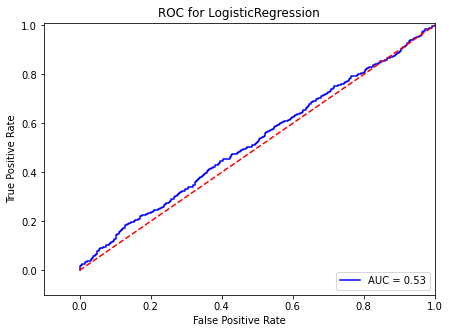

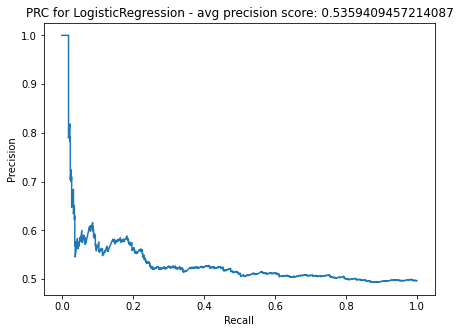

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector 

============================= KNearest =============================
Mean cross validation score: 0.6465625
Mean precision score: 0.6492176592243902
Mean Recall score: 0.6356998241528444
Mean ROC-AUC score: 0.6485343748786971
Mean F1 score: 0.6422570474135729
******* Real test dataset metrics *******
Accuracy score for the real test set:
 0.6431784107946027
confusion matrix for the real test set:
 [[637 371]
 [343 650]]
Classification report for the real test set:
               precision    recall  f1-score   support

           0       0.65      0.63      0.64      1008
           1       0.64      0.65      0.65       993

    accuracy                           0.64      2001
   macro avg       0.64      0.64      0.64      2001
weighted avg       0.64      0.64      0.64      2001



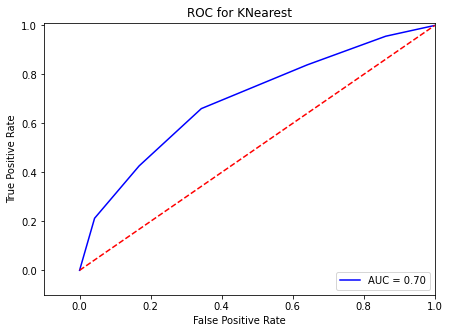

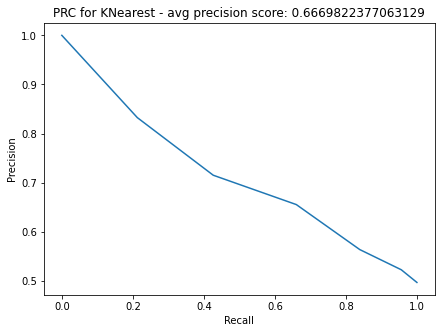

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

============================= Support Vector Classifier =============================
Mean cross validation score: 0.58165625
Mean precision score: 0.5717197840112115
Mean Recall score: 0.6613877667411244
Mean ROC-AUC score: 0.5845337181500885
Mean F1 score: 0.6123741372198721
******* Real test dataset metrics *******
Accuracy score for the real test set:
 0.5857071464267866
confusion matrix for the real test set:
 [[561 447]
 [382 611]]
Classification report for the real test set:
               precision    recall  f1-score   support

           0       0.59      0.56      0.58      1008
           1       0.58      0.62      0.60       993

    accuracy                           0.59      2001
   macro avg       0.59      0.59      0.59      2001
weighted avg       0.59      0.59      0.59      2001

============================= DecisionTreeClassifier =============================
Mean cross validation score: 0.6150312499999999
Mean precision score: 0.6209430429206553
Mean Recall s

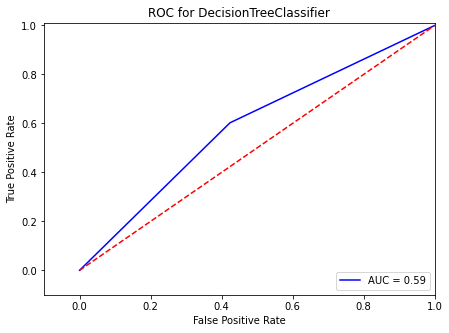

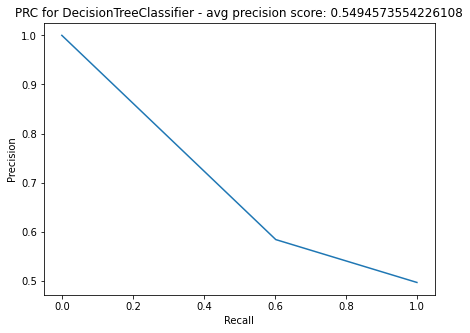

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = col

============================= Naive Bayes =============================
Mean cross validation score: 0.51009375
Mean precision score: 0.5310446904845615
Mean Recall score: 0.19735912424948115
Mean ROC-AUC score: 0.5121501168154916
Mean F1 score: 0.28314023615199707
******* Real test dataset metrics *******
Accuracy score for the real test set:
 0.5152423788105946
confusion matrix for the real test set:
 [[736 272]
 [698 295]]
Classification report for the real test set:
               precision    recall  f1-score   support

           0       0.51      0.73      0.60      1008
           1       0.52      0.30      0.38       993

    accuracy                           0.52      2001
   macro avg       0.52      0.51      0.49      2001
weighted avg       0.52      0.52      0.49      2001



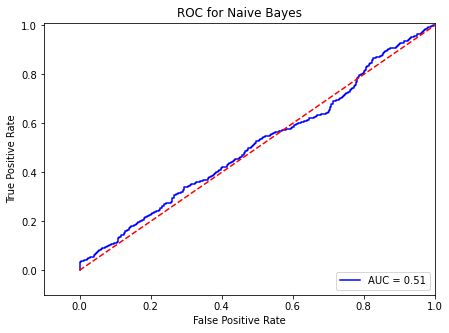

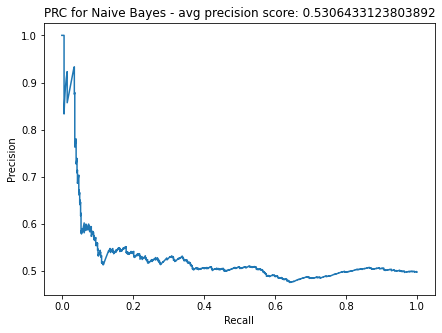

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DataConversionWarning: A column-vector y wa

============================= Random forests =============================
Mean cross validation score: 0.6572499999999999
Mean precision score: 0.653204509230728
Mean Recall score: 0.6362093056413668
Mean ROC-AUC score: 0.6513916463320808
Mean F1 score: 0.6444604116694156
******* Real test dataset metrics *******
Accuracy score for the real test set:
 0.6456771614192903
confusion matrix for the real test set:
 [[636 372]
 [337 656]]
Classification report for the real test set:
               precision    recall  f1-score   support

           0       0.65      0.63      0.64      1008
           1       0.64      0.66      0.65       993

    accuracy                           0.65      2001
   macro avg       0.65      0.65      0.65      2001
weighted avg       0.65      0.65      0.65      2001



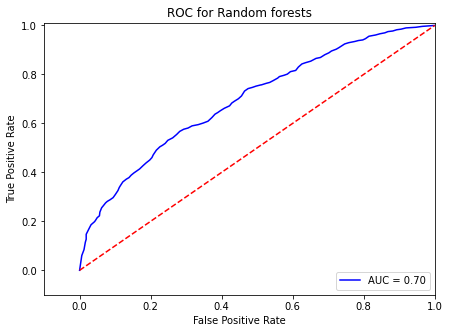

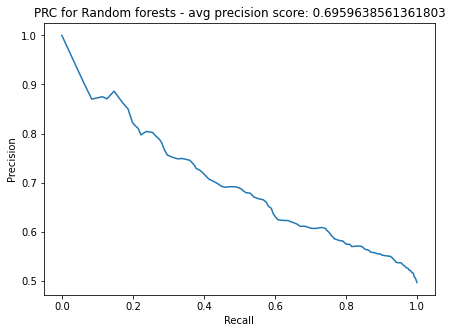

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

============================= XGBoost Classifier =============================
Mean cross validation score: 0.6770625
Mean precision score: 0.6866360155245849
Mean Recall score: 0.6334321879505093
Mean ROC-AUC score: 0.6739608268020352
Mean F1 score: 0.6587218706506327
******* Real test dataset metrics *******
Accuracy score for the real test set:
 0.6696651674162919
confusion matrix for the real test set:
 [[700 308]
 [353 640]]
Classification report for the real test set:
               precision    recall  f1-score   support

           0       0.66      0.69      0.68      1008
           1       0.68      0.64      0.66       993

    accuracy                           0.67      2001
   macro avg       0.67      0.67      0.67      2001
weighted avg       0.67      0.67      0.67      2001



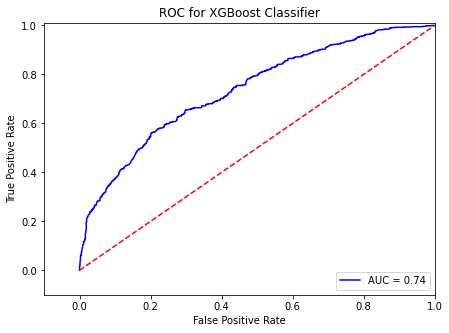

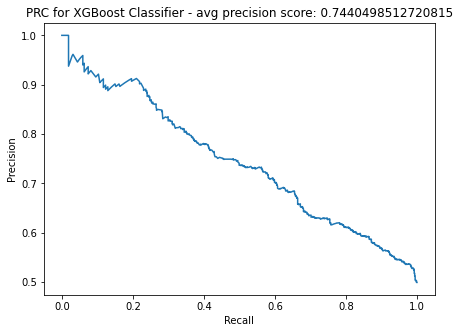

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

============================= GradientBoostingClassifier =============================
Mean cross validation score: 0.6775937499999999
Mean precision score: 0.6841921944694076
Mean Recall score: 0.635200481599417
Mean ROC-AUC score: 0.6729848561843239
Mean F1 score: 0.6586745469727722
******* Real test dataset metrics *******
Accuracy score for the real test set:
 0.6736631684157921
confusion matrix for the real test set:
 [[708 300]
 [353 640]]
Classification report for the real test set:
               precision    recall  f1-score   support

           0       0.67      0.70      0.68      1008
           1       0.68      0.64      0.66       993

    accuracy                           0.67      2001
   macro avg       0.67      0.67      0.67      2001
weighted avg       0.67      0.67      0.67      2001



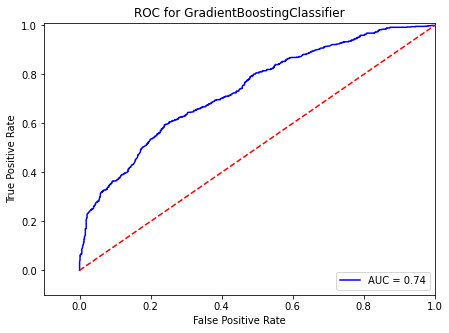

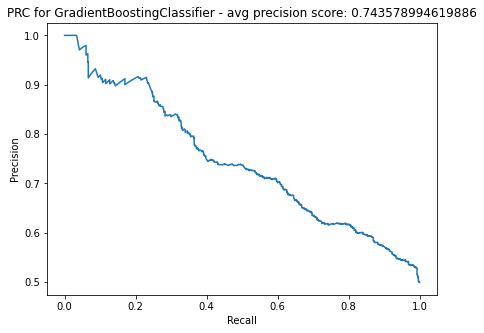

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d

============================= MLP Classifier =============================
Mean cross validation score: 0.6256562500000001
Mean precision score: 0.6712645635141132
Mean Recall score: 0.5050434865263058
Mean ROC-AUC score: 0.6293794717898857
Mean F1 score: 0.573978446445514
******* Real test dataset metrics *******
Accuracy score for the real test set:
 0.624687656171914
confusion matrix for the real test set:
 [[702 306]
 [445 548]]
Classification report for the real test set:
               precision    recall  f1-score   support

           0       0.61      0.70      0.65      1008
           1       0.64      0.55      0.59       993

    accuracy                           0.62      2001
   macro avg       0.63      0.62      0.62      2001
weighted avg       0.63      0.62      0.62      2001



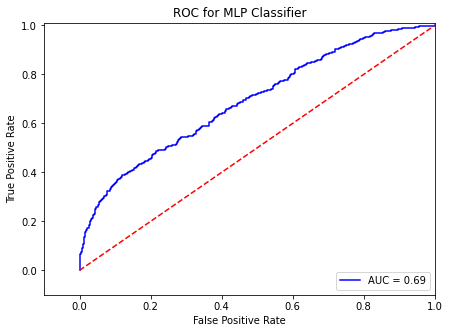

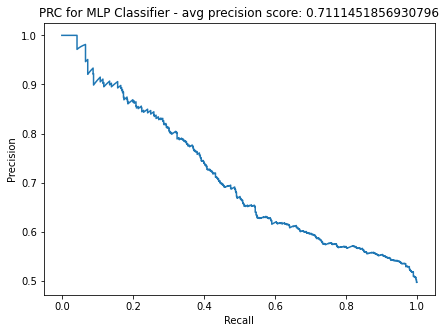

In [0]:
run_all_models()

#Results:
Hence, it is understood that Performance of the models before and after performing the LDA have been merely the same. Precisely, the performance after performing LDA has reduced.


##Pickling to save the trained model

In [0]:
import pickle
best_classifier = classifiers['XGBoost Classifier']
best_classifier_model_path = '/content/drive/Shared drives/SheCodes/MLSpring2020/shecodes_employee_attrition/Alternus Vera Sprint 4/Models/BestClassifierForCS.pickle'

In [0]:
pickle.dump(best_classifier, open(best_classifier_model_path, 'wb'))

In [0]:
df_test = df_train_final

In [0]:
df_test.drop(df_test.index, inplace=True)

In [0]:
#df_test

##Prediction on Unseen Data and Inference

In [0]:
df_test = df_test.append({'id':32,'title': 'Jonathan Gruber','author': 'Jonathan Gruber', 'text': 'I dont know who (Jonathan Gruber) is.','label':1,'barelytruecounts':10,'falsecounts':5,'halftruecounts':12,'mostlytrueocunts':10,'pantsonfirecounts':20}, ignore_index=True) 
df_test


,id,title,author,text,label,barelytruecounts,falsecounts,halftruecounts,mostlytrueocunts,pantsonfirecounts
0,32.0,Jonathan Gruber,Jonathan Gruber,I dont know who (Jonathan Gruber) is.,1,10.0,5.0,12.0,10.0,20.0


In [0]:
#Generating statistical features on the test data
df_test['Title_length'] = df_test['title'].str.len()
df_test['Text_length'] = df_test['text'].str.len()

In [0]:
#creating a new feature "applicability_of_text" which is a combination of then text length 
df_test["applicability_of_text"] = df_test["Text_length"]*df_test["Text_length"].mean()
df_test["applicability_of_title"] = df_test["Title_length"]*df_test["Title_length"].mean()

In [0]:
df_test = df_test.drop(['id','title','author','text'], axis=1)

In [0]:
y = df_test['label']
X = df_test.drop(['label'], axis=1)

In [0]:
best_classifier.fit(X,y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
pred = best_classifier.predict_proba(X)
print(pred)


[[0.8835046  0.11649537]]


It is hence understood from the above prediction that the model predicted the label "1" i.e "Fake" with 88% accuracy and label "0" i.e. "Not Fake" with 12% accuracy

**Results Interpretation Before performing LDA**

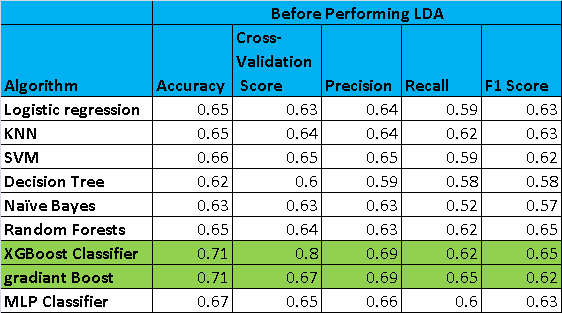

**Results Interpretation After performing LDA**

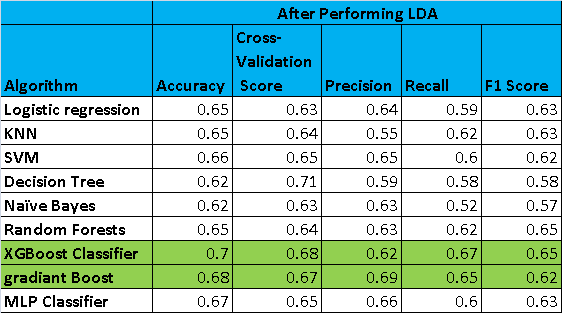